In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 100micro

In [2]:
modulation = 93 #Hz
loop_number = 10    
res = 1/3003004800

sam, sr , cycle_length = Adj9(res,modulation,loop_number)

In [3]:
sam

1614528

In [4]:
sr

3003022080

In [5]:
interval = cycle_length*1e6 #micro
interval

537.6344086021505

# AWG and Pulse files setup

In [6]:
AWG_Settings_100micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':3003022080,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\pos\100micro'
}

In [7]:
M8190A = VisaR(AWG_Settings_100micro,60000)

In [8]:
Initialization(M8190A,AWG_Settings_100micro)

Instruments Sampling Frecuency set to 3.00302208000000E+09Hz
Instruments Direct Out DC Output route Voltage set to 6.75000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [15]:
M8190A.write('FREQ:RAST 3003022080')

21

In [9]:
Pump_100micro = {
    'Name':'Pump_100micro',
    'Amplitude': 2*60,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_100micro = {
    'Name':'ProbeA_100micro',
    'Amplitude':2*30,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [11]:
ProbeB_100micro= {
    'Name':'ProbeB_100micro',
    'Amplitude':-2*30,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':6,
    'Sweep time':1,
    'Sweep Duration':0
}

In [12]:
ProbeB_100micro_empty= {
    'Name':'ProbeB_100micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [13]:
PulseScheme_A_100micro =  {
    'Name' : 'PulseScheme_A_100micro',
    'Pulse Scheme': [Pump_100micro,ProbeA_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\100micro'
}

In [14]:
PulseScheme_B_100micro =  {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [Pump_100micro,ProbeB_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\1nano'
}

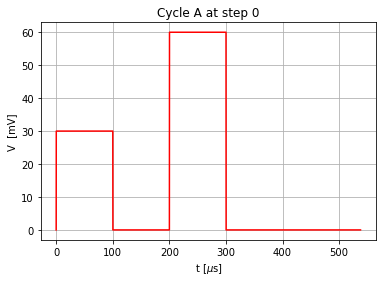

In [15]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100micro {g} step.png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

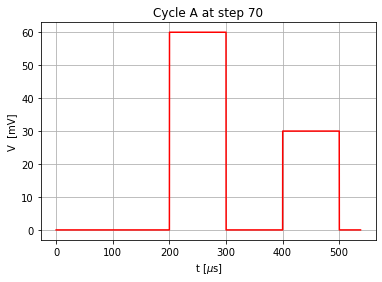

In [17]:
step = 70
pul1 = Sweep_teil(PulseScheme_A_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100micro {g} step.png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

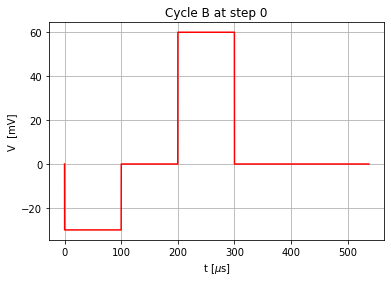

In [18]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100micro {g} step.png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

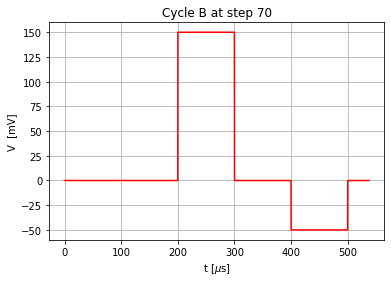

In [54]:
step = 70
pul1 = Sweep_teil(PulseScheme_B_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100micro, {g} step .png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

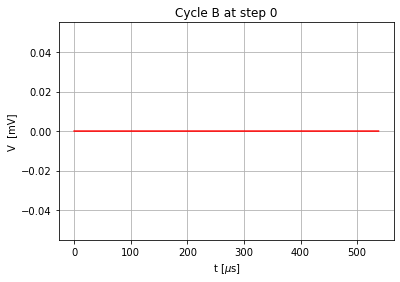

In [57]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_100micro_empty,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100micro {g} step empty.png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

In [25]:
interval*10

5376.344086021505

In [26]:
sam

1614528

In [19]:
sweeping_run_a_100micro = Sweeping_Single_List_File_teil(PulseScheme_A_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'A')[0]

In [20]:
sweeping_run_b_100micro = Sweeping_Single_List_File_teil(PulseScheme_B_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'B')[0]

In [21]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100micro, k)


with open(r"{dict}\cycleB_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100micro, h)

In [58]:
sweeping_run_b_100micro_empty = Sweeping_Single_List_File_teil(PulseScheme_B_100micro_empty,70,interval,sam,0,70,AWG_Settings_100micro_empty,'B')[0]

In [60]:
#Exporting pickle empty cycle

with open(r"{dict}\cycleB_31steps_93Hz_100micro_empty.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100micro_empty, h)

In [19]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as j:
    sweeping_run_a_100micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as f:
    sweeping_run_b_100micro= pickle.load(f)

In [17]:
sweeping_run_a_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\60,30\\pos\\100micro\\SegmentA_1614528_30.csv'

In [19]:
sweeping_run_b_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\60,30\\pos\\100micro\\SegmentB_1614528_30.csv'

In [29]:
Sequence_File(M8190A,sweeping_run_a_100micro['Pulse File Location, at step 0'],sweeping_run_b_100micro['Pulse File Location, at step 0'],10)

Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND


8

In [20]:
loop_number

10

# Loading

In [16]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [17]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '50 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '93Hz'
}

In [ ]:
def Voltage_Autocorrelation_loop_cut(instrument,DAQ_settings,playingtime,fileA,fileB,location,Lock_In,loop,cut):
    
    """ This function loads a sweeping sequence into the AWG, plays it and triggers it with the DAQ, while also storing the DAQ values as csv files.
      
        Sequences are formed within the AWG by combining the csv files at the same step in fileA and fileB

        instrument = object class given by Pyvisa API of the current connected device
        DAQ_Settings = Dictionary, with the settings of the DAQ box
        playingtime = int, total data collection time of the DAQ, given in seconds, maximum is 180s (given by the timeout time in the DAQ_Measuring function)
        fileA = dictionary, with the file paths of the csv files to be loaded into the awg as first part of the sequence
        fileB = dictionary, with the file paths of the csv files to be loaded into the awg as second part of the sequence
        location = strng, file path were the data is going to be saved
        Lock_In = dictionary, the keys are the Lock In Amplifier settings used to address them in the file name
        loop = int, number of repetitions that each waveform will repeat itself per cycle
        cut = int, cut time in seconds
    """
    #empty arrays where the data will be stored
    cut_off = int(cut*1000)
    measurement_data = np.zeros((len(fileA),2),  dtype=object)
    average = np.zeros((len(fileA)))

    for i,j,k in zip(fileA, fileB,range(0,len(fileA))):
        Sequence_File(instrument,fileA[i],fileB[j],loop)
        measurement_data[k][0], measurement_data[k][1] = DAQ_Measuring(DAQ_settings,DAQ_settings['Sampling Frequency'],playingtime,instrument)
        np.savetxt(r'{loc}\diode_signal_step{stp}_{f}sdaqtime_{mod}_{tc}_{sens}.csv'.format(loc = location ,stp = k,f = playingtime, mod = Lock_In['Modulation'] ,tc = Lock_In['Time Constant'], sens = Lock_In['Sensitivity']), measurement_data[k][0], delimiter=',')
        average[k] = np.average(measurement_data[k][0][cut_off:])
        print('Average Value for measurement at step {step} is'.format(step = k),average[k],'V')
        np.savetxt(r'{loc}\averaged signal_31steps_{dur}sdaqtime_{mod}_{tc}_{sens}.csv'.format(loc =location,dur = playingtime,  mod = Lock_In['Modulation'] , tc = Lock_In['Time Constant'], sens = Lock_In['Sensitivity']),average,delimiter=',')
        
    return measurement_data, average

In [23]:
loop_number

10

In [34]:
def Voltage_Autocorrelation_loop2(instrument,DAQ_settings,playingtime,fileA,fileB,location,Lock_In,loop):
    
    """ This function loads a sweeping sequence into the AWG, plays it and triggers it with the DAQ, while also storing the DAQ values as csv files.
      
        Sequences are formed within the AWG by combining the csv files at the same step in fileA and fileB

        instrument = object class given by Pyvisa API of the current connected device
        DAQ_Settings = Dictionary, with the settings of the DAQ box
        playingtime = int, total data collection time of the DAQ, given in seconds, maximum is 180s (given by the timeout time in the DAQ_Measuring function)
        fileA = dictionary, with the file paths of the csv files to be loaded into the awg as first part of the sequence
        fileB = dictionary, with the file paths of the csv files to be loaded into the awg as second part of the sequence
        location = strng, file path were the data is going to be saved
        Lock_In = dictionary, the keys are the Lock In Amplifier settings used to address them in the file name
        loop = int, number of repetitions that each waveform will repeat itself per cycle
    """
    #empty arrays where the data will be stored
    measurement_data = np.zeros((len(fileA),2),  dtype=object)
    average = np.zeros((len(fileA)))

    for i,j,k in zip(fileA, fileB,range(0,len(fileA))):
        Sequence_File(instrument,fileA[i],fileB[j],loop)
        measurement_data[k][0], measurement_data[k][1] = DAQ_Measuring(DAQ_settings,DAQ_settings['Sampling Frequency'],playingtime,instrument)
        np.savetxt(r'{loc}\diode_signal_step{stp}_{f}sdaqtime_{mod}_{tc}_{sens}.csv'.format(loc = location ,stp = k,f = playingtime, mod = Lock_In['Modulation'] ,tc = Lock_In['Time Constant'], sens = Lock_In['Sensitivity']), measurement_data[k][0], delimiter=',')
        average[k] = np.average(measurement_data[k][0][2000:])
        print('Average Value for measurement at step {step} is'.format(step = k),average[k],'V')
        np.savetxt(r'{loc}\averaged signal_31steps_{dur}sdaqtime_{mod}_{tc}_{sens}.csv'.format(loc =location,dur = playingtime,  mod = Lock_In['Modulation'] , tc = Lock_In['Time Constant'], sens = Lock_In['Sensitivity']),average,delimiter=',')
        
    return measurement_data, average

In [20]:
playingtime = 7

data, averaged_data = Voltage_Autocorrelation_loop_cut(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100micro,sweeping_run_b_100micro,PulseScheme_A_100micro['Measurement file Path'],Lock_In_Settings,loop_number,2)

Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 0 is 1.871191141882213 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 1 is 1.8646171962626097 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 2 is 1.856902240900282 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 3 is 1.82516148771109 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 4 is 1.8124602801711367 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2

In [ ]:
#playingtime = 3

#Diode_Signal, averaged_data = Voltage_Autocorrelation_loop2(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100micro,sweeping_run_b_100micro,PulseScheme_A_100micro['Measurement file Path'],Lock_In_Settings,loop_number)

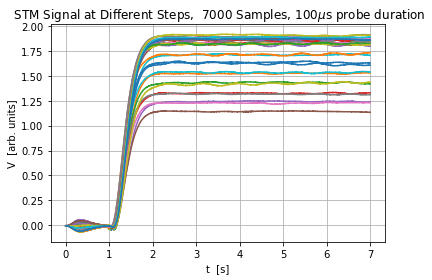

In [21]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(data)):
    plt.plot(data[i][1],data[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [arb. units]')
ax.set_xlabel('t  [s]')
ax.set_title(r' STM Signal at Different Steps,  {b} Samples, 100$\mu$s probe duration'.format(b = len(data[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\STM Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 100 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [22]:
time_delay = np.linspace(-200,200,31)

In [31]:
%matplotlib widget

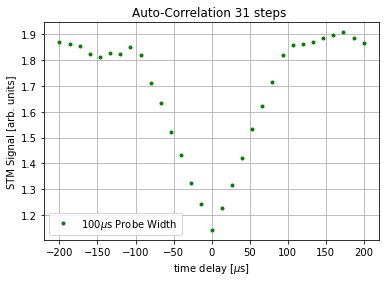

In [23]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,'.',label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [24]:
normalized_data = AutoCorrelation_Normalized(averaged_data,time_delay,8,8)
np.savetxt(r'{loc}\normalized Autocorrelation.csv'.format(loc = PulseScheme_A_100micro['Measurement file Path']),normalized_data[0],delimiter=',')
normalized_data

(array([0.98202365, 0.98631671, 0.99124886, 1.00933609, 1.01726394,
        1.00998336, 1.01193257, 0.99763392, 1.01713895, 1.08288574,
        1.13369618, 1.21717492, 1.29679202, 1.40127075, 1.49705119,
        1.62851076, 1.51784427, 1.41559389, 1.31405368, 1.21641865,
        1.15193392, 1.09084931, 1.02781846, 1.00707886, 1.00659338,
        1.003284  , 0.99531853, 0.99090141, 0.98565929, 0.99885264,
        1.00827732]),
 1.8607909668322002,
 0.00011618504817066753)

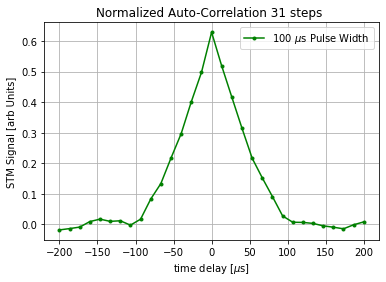

In [25]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,normalized_data[0]-1,'.-',label=r'100 $\mu$s Pulse Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title('Normalized Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Normalized Autocorrelation  Sigma STM function 31 steps 100u 93Hz length tc = {a}, sens {b}, {c}s DAQ.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [10]:
1/(45.45)

0.022002200220022

In [12]:
complete_time = 1/880

In [13]:
complete_time * 1e6

1136.3636363636363

In [38]:
modulation = 879 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.0005688282138794084

In [39]:
cycle_time *1e6 #micro seconds

568.8282138794084

In [40]:
cycle_time *1e9 #nano seconds

568828.2138794084

In [17]:
cycle_time2 = 0.0005681818181818182
comp_time2 = cycle_time2 * 2
mod2 = 1/comp_time2
mod2

880.0

In [18]:
full_cycle = 0.0005681818181818182
# loop_number = 
loop_number = full_cycle / 50
loop_number

1.1363636363636363e-05

In [22]:
round((cycle_time *1e9)/50)

11364

In [24]:
((cycle_time *1e9)/50) *50

568181.8181818181

In [25]:
round((cycle_time *1e9)/50) *50

568200

In [ ]:
568182 #total time length nano
50 #segment length
11377#loop number

In [41]:
568828/50

11376.56

In [37]:
50*11364

568200

In [44]:
1/(2*568828 *1e-9)

879.0003305041241

In [ ]:
samples = int(6720000000 * c)
samples

302

In [ ]:
samples/48

6.291666666666667

In [ ]:
sam = Granularity(samples)
sam

336

In [ ]:
adjusted_sr = int(sam/5e-8)

In [ ]:
adjusted_sr

6720000000

In [ ]:
6720000000

In [51]:
resolution = 1/6240000000

resolution

1.6025641025641025e-10

In [53]:
Adj(resolution,45.45,110000)

(672, 6719328000)

In [61]:
%matplotlib inline

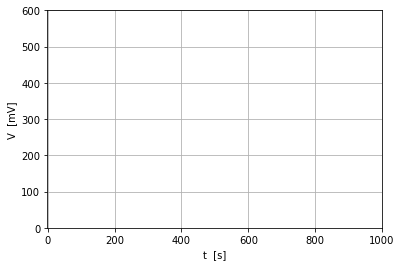

In [62]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import sweep0, Sweep
from Dictionaries import AWG_Settings1, Rabi, Probe1, PulsoG, Rabi2

#Pulse schemes



Pulses_List = [
    Rabi,Probe1
    ];

Pulses_List = [
    Rabi2,Probe1
    ];

PScheme=[
    PulsoG
    ]

#Plotting

plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1000), ylim=(0,600))
ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
line, = ax.plot([], [], color='black')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  Whe iterate over p and define the stopping point by the end value of frames in the anim function
def animate(i):
    y, time = Sweep(Pulses_List,100,i,100,1000)
    line.set_data(time, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.linspace(0,100), interval=400, blit=True)
plt.show()

#in our case, frames should match to the total number of time steps P


In [ ]:
Adj(45,220000)

In [11]:
def Adj1(modulation,repetitions):
    """
    240 minimum length
    """

    time_length_segment = Tc(modulation,repetitions)

    minimum_sample_length = 240 

    sampling_frequency0 = int(minimum_sample_length / time_length_segment)

    return minimum_sample_length,sampling_frequency0, time_length_segment

In [24]:
sam,sr, interval = Adj1(880,220000)

In [25]:
sam

240

In [26]:
sr

92928000000

In [27]:
interval

2.5826446280991735e-09

In [23]:
complete_time_length = 2*interval *220000
modulation = 1/complete_time_length
modulation

45.0

In [33]:
def is_in(x):
    if x in range(10,25):
        print(x,'is in the',range(10,25))
    else:
        print(x,'is not in the',range(10,25))

In [35]:
is_in(9)

9 is not in the range(10, 25)


In [38]:
def Adj_minimum2(modulation,repetitions):
    """ This function returns the proper sampling frequency and segment time length for waveforms with 240 samples, given the desired modulation frequency and number of repetitios
    

    modulation: int, desired modulation frequenxy in Herz to be used as a reference signal in the Lock-In Amplifier
    repetitions: int, desired number of repetitions (loop number). the total duration of one cycle will be split into this number
    """

    time_length_segment = Tc(modulation,repetitions)

    sample_length = 240 

    sampling_frequency0 = int(sample_length / time_length_segment)

    while  not sampling_frequency0 in range(125000000,8000000000+1):
        sample_length =sample_length  + 48
        sampling_frequency0 = int(sample_length / time_length_segment)

    return sample_length, sampling_frequency0, time_length_segment

In [50]:
def Adj9(resolution,modulation,repetitions):
    """
    240 minimum length
    """

    time_length_segment = Tc(modulation,repetitions)

    samples0,sampling_frequency0 = Param(time_length_segment,resolution)

    if samples0 < 240 :
        samples0 = 240
        sampling_frequency0 = int(samples0/time_length_segment)
        return samples0,sampling_frequency0

    else :
        if div(samples0) == True:
            return samples0,sampling_frequency0
        else:
            adjusted_samples = Granularity(samples0)
            adjusted_sr = int(adjusted_samples/time_length_segment)

            return adjusted_samples, adjusted_sr

In [42]:
Adj_minimum(880,220000)

(240, 1.4705882352941175e-10, 2.5826446280991735e-09)

In [3]:
time_delay

array([-200.        , -186.66666667, -173.33333333, -160.        ,
       -146.66666667, -133.33333333, -120.        , -106.66666667,
        -93.33333333,  -80.        ,  -66.66666667,  -53.33333333,
        -40.        ,  -26.66666667,  -13.33333333,    0.        ,
         13.33333333,   26.66666667,   40.        ,   53.33333333,
         66.66666667,   80.        ,   93.33333333,  106.66666667,
        120.        ,  133.33333333,  146.66666667,  160.        ,
        173.33333333,  186.66666667,  200.        ])

In [4]:
np.savetxt('timedelay_100u.csv',time_delay,delimiter=',')

In [5]:
def fitted_100u(x):
    
    y = 1.6876 +3.31447e-4*x

    return y

In [16]:
avr_= np.array ([ 1.62E+00,
1.62E+00,
1.63E+00,
1.63E+00,
1.64E+00,
1.65E+00,
1.65E+00,
1.64E+00,
1.62E+00,
1.60E+00,
1.58E+00,
1.56E+00,
1.54E+00,
1.52E+00,
1.50E+00,
1.48E+00,
1.50E+00,
1.54E+00,
1.58E+00,
1.61E+00,
1.64E+00,
1.68E+00,
1.71E+00,
1.73E+00,
1.73E+00,
1.74E+00,
1.74E+00,
1.75E+00,
1.74E+00,
1.74E+00,
1.75E+00

])

In [14]:
fitted = np.array([fitted_100u(x) for x in time_delay])

In [17]:
fitted

array([1.6213106 , 1.62572989, 1.63014919, 1.63456848, 1.63898777,
       1.64340707, 1.64782636, 1.65224565, 1.65666495, 1.66108424,
       1.66550353, 1.66992283, 1.67434212, 1.67876141, 1.68318071,
       1.6876    , 1.69201929, 1.69643859, 1.70085788, 1.70527717,
       1.70969647, 1.71411576, 1.71853505, 1.72295435, 1.72737364,
       1.73179293, 1.73621223, 1.74063152, 1.74505081, 1.74947011,
       1.7538894 ])

In [19]:
fitted/avr_

array([1.00080901, 1.00353697, 1.00009153, 1.00280275, 0.99938279,
       0.99600428, 0.99868264, 1.00746686, 1.02263268, 1.03817765,
       1.05411616, 1.07046335, 1.08723514, 1.1044483 , 1.12212047,
       1.14027027, 1.12801286, 1.1015835 , 1.07649233, 1.05917837,
       1.04249785, 1.020307  , 1.00499126, 0.99592737, 0.99848187,
       0.9952833 , 0.99782312, 0.99464658, 1.00290277, 1.00544259,
       1.00222251])

In [9]:
np.savetxt('after_fitting.csv',fitted,delimiter=',')

In [20]:
np.savetxt('normalized_100u.csv',fitted / avr_,delimiter=',')

In [24]:
points_tofit = np.concatenate((avr_[:5], avr_[21:]))
points_tofit

array([1.62, 1.62, 1.63, 1.63, 1.64, 1.68, 1.71, 1.73, 1.73, 1.74, 1.74,
       1.75, 1.74, 1.74, 1.75])

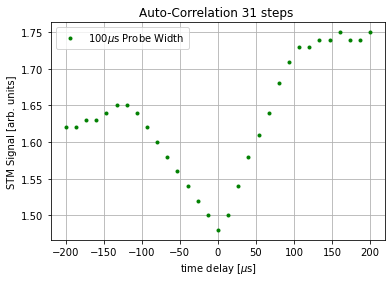

In [35]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,avr_,'.',label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [44]:
avr_[22:] == avr_[-8:]

<ipython-input-44-22711032ccd5>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  avr_[22:] == avr_[-8:]


False

In [40]:
points_tofit = np.concatenate((avr_[:5], avr_[21:]))
time_delay_tofit = np.concatenate((time_delay[:5],time_delay[21:] ))

fitted_slope,fitted_intercep = np.polyfit(time_delay_tofit,points_tofit,1)

fitted_autocor = np.array([fitted_intercep + fitted_slope*x for x in time_delay])

normalized_autocor = avr_/fitted_autocor

In [32]:
fitted_autocor = np.array([fitted_intercep + fitted_slope*x for x in time_delay])

In [33]:
normalized_autocor = avr_/fitted_autocor

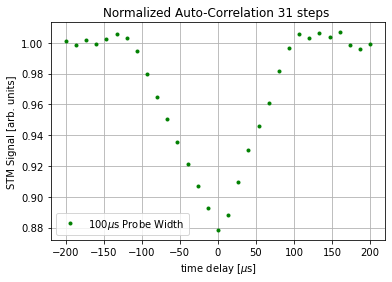

In [41]:
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,normalized_autocor,'.',label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title('Normalized Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

#fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

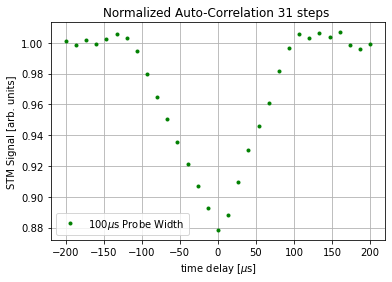

In [ ]:
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,normalized_autocor,'.',label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title('Normalized Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

#fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

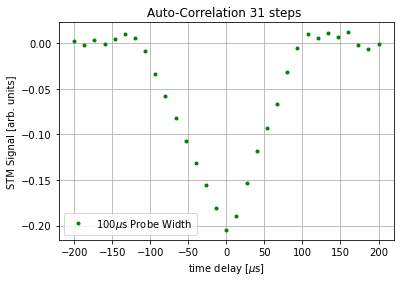

In [36]:
normalized_autocor2 = avr_- fitted_autocor

fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,normalized_autocor2,'.',label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

#fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [ ]:
def fitted_100u(x):
    
    y = 1.6876 +3.31447e-4*x

    return y

In [ ]:
np.concatenate()